# Punto 1

In [13]:
valor = 1.8

In [14]:
def decimal_to_ieee754(valor):
    """
    Convierte un número decimal de 32 bits a su representación en formato IEEE 754.

    Args:
        num: El número decimal de 32 bits a convertir.

    Returns:
        El número en su representación en formato IEEE 754 como una cadena de bits.
    """
    # Comprueba el signo del número y conviértelo a positivo
    sign = 0 if valor >= 0 else 1
    valor = abs(valor)

    # Convierte el número en una fracción binaria normalizada
    exponent = 0
    while valor >= 2:
        valor /= 2
        exponent += 1
    while valor < 1:
        valor *= 2
        exponent -= 1
    fraction = valor - 1

    # Calcula el exponente en exceso
    exp_offset = 127
    exponent += exp_offset

    # Convierte los diferentes campos en cadenas de bits
    sign_bits = bin(sign)[2:]
    exponent_bits = bin(exponent)[2:].zfill(8)
    fraction_bits = ""
    for i in range(23):
        fraction *= 2
        bit = int(fraction)
        fraction_bits += str(bit)
        fraction -= bit

    # Concatena los diferentes campos en una cadena de bits
    bits = sign_bits + exponent_bits + fraction_bits

    # Devuelve la cadena de bits de la representación IEEE 754
    return bits


In [15]:
ieee754 = decimal_to_ieee754(valor)
print(ieee754)


00111111111001100110011001100110


In [16]:
def ieee754_to_hex(bits):
    """
    Convierte una cadena de bits en formato IEEE 754 a su representación hexadecimal.

    Args:
        bits: La cadena de bits en formato IEEE 754.

    Returns:
        La representación hexadecimal del número.
    """
    # Convierte la cadena de bits en un número entero
    valor = int(bits, 2)

    # Convierte el número entero en su representación hexadecimal
    hex_str = hex(valor)[2:].zfill(8)

    # Devuelve la representación hexadecimal
    return hex_str


In [17]:
bits = decimal_to_ieee754(valor)
hex_str = ieee754_to_hex(bits)
print(hex_str)


3fe66666


# Punto 2

In [18]:
from IPython.display import display, Math
import sympy as sp
from sympy.parsing.sympy_parser import parse_expr
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sympy.plotting as pls
import seaborn as sns
import numpy as np
import math as mt

In [19]:
x = parse_expr("x")
f = parse_expr("(x+1)**(1/3)")


In [20]:
f

(x + 1)**(1/3)

In [24]:
valor = 4
error = []
error_relativo = []
pol = []
funcion_eval = f.subs(x,valor).evalf()
funcion_eval

1.70997594667670

In [27]:
import math

# Definimos la función f(x)
def f(x):
    return (x+1)**(1/3)

# Definimos la expansión en serie de Taylor de f(x) hasta el orden 10
def taylor_series(x, n):
    result = 0
    for i in range(n+1):
        result += ((-1)**i * math.gamma(1/3)) / (math.gamma(i+1/3) * math.gamma(1/3-i)) * (x-1)**i
    return result

# Evaluamos la serie de Taylor en x=4 para tres valores diferentes de punto de expansión
x_values = [0, 1, 2]
for x in x_values:
    taylor_approx = taylor_series(x, 10)
    exact_value = f(4)
    rel_error = abs(taylor_approx - exact_value) / exact_value
    pct_error = rel_error * 100
    print(f"Punto de expansión en x={x}")
    print(f"Aproximación de Taylor: {taylor_approx}")
    print(f"Valor exacto de f(4): {exact_value}")
    print(f"Error relativo: {rel_error}")
    print(f"Error porcentual: {pct_error}%\n")


Punto de expansión en x=0
Aproximación de Taylor: 0.8646372344023854
Valor exacto de f(4): 1.7099759466766968
Error relativo: 0.49435707789762184
Error porcentual: 49.43570778976218%

Punto de expansión en x=1
Aproximación de Taylor: 0.3732821739073952
Valor exacto de f(4): 1.7099759466766968
Error relativo: 0.7817032604272233
Error porcentual: 78.17032604272232%

Punto de expansión en x=2
Aproximación de Taylor: 12.91640520706183
Valor exacto de f(4): 1.7099759466766968
Error relativo: 6.553559587878765
Error porcentual: 655.3559587878765%



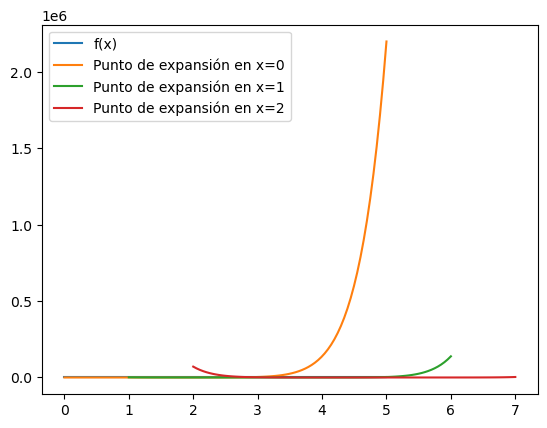

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función f(x)
def f(x):
    return (x+1)**(1/3)

# Definimos la expansión en serie de Taylor de f(x) hasta el orden 10
def taylor_series(x, n):
    result = 0
    for i in range(n+1):
        result += ((-1)**i * math.gamma(1/3)) / (math.gamma(i+1/3) * math.gamma(1/3-i)) * (x-1)**i
    return result

# Evaluamos la función y las aproximaciones de Taylor para cada punto de expansión en el intervalo [0, 5]
x_values = np.linspace(0, 5, 100)
f_values = f(x_values)
approx_values_0 = taylor_series(x_values, 10)
approx_values_1 = taylor_series(x_values-1, 10)
approx_values_2 = taylor_series(x_values-2, 10)

# Graficamos los resultados
plt.plot(x_values, f_values, label="f(x)")
plt.plot(x_values, approx_values_0, label="Punto de expansión en x=0")
plt.plot(x_values+1, approx_values_1, label="Punto de expansión en x=1")
plt.plot(x_values+2, approx_values_2, label="Punto de expansión en x=2")
plt.legend()
plt.show()